# Step 1:  Import Libraries


In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# create a path variable
path = r'C:\Users\Sreelakshmi\Desktop\Instacart Basket Analysis'

#### Import the file orders_products_customer_combined.pkl into the data frame

In [3]:
# use read_pickle() function to import the file

ords_prods_cust_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customer_combined.pkl'))

# Step 2: Creating visualizations

### 1. Bar Charts

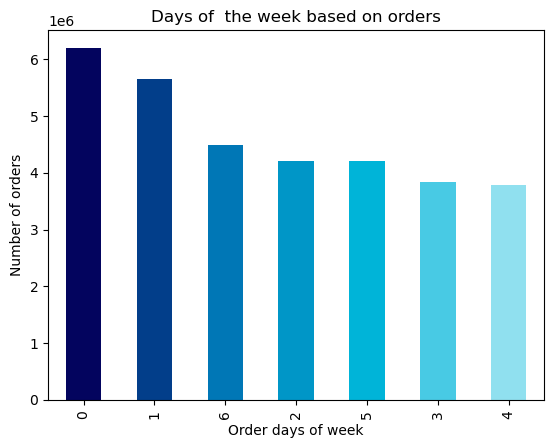

In [4]:
# create a Bar Chart
ords_prods_cust_merge['order_days_of_week'].value_counts().plot.bar(color = ['#03045e','#023e8a', '#0077b6', '#0096c7', '#00b4d8', '#48cae4', '#90e0ef'])
plt.title('Days of  the week based on orders')
plt.xlabel('Order days of week')
plt.ylabel('Number of orders')
plt.savefig(os.path.join(path,'Analysis', 'Visualizations', 'barchart_order_dow.png'))

#### Sorting the index of the Bar chart

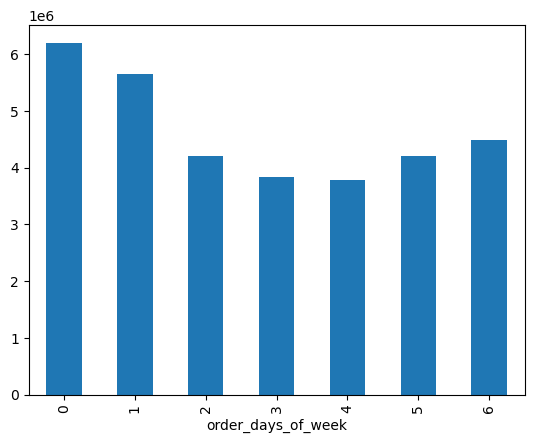

In [5]:
bar = ords_prods_cust_merge['order_days_of_week'].value_counts().sort_index().plot.bar()

### Applying color to the Bar chart

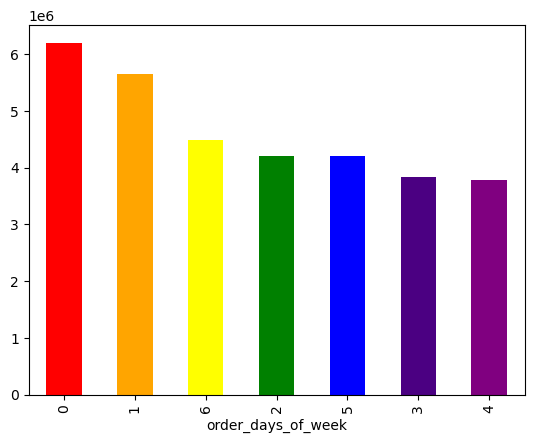

In [6]:
bar = ords_prods_cust_merge['order_days_of_week'].value_counts().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple'])

# Exporting Charts

In [7]:
# Exporting the chart as png image file
bar.figure.savefig(os.path.join(path,'Analysis', 'Visualizations', 'bar_order_dow.png'))

# Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

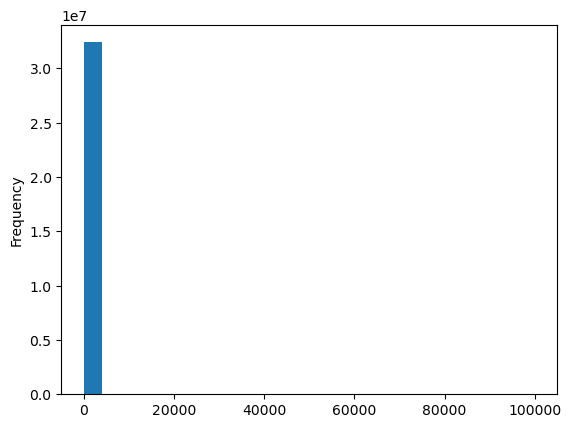

In [8]:
# create a histogram for the column prices
ords_prods_cust_merge['prices'].plot.hist(bins = 25)

In [9]:
# checking exploratory statistics of the column 'prices'
ords_prods_cust_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

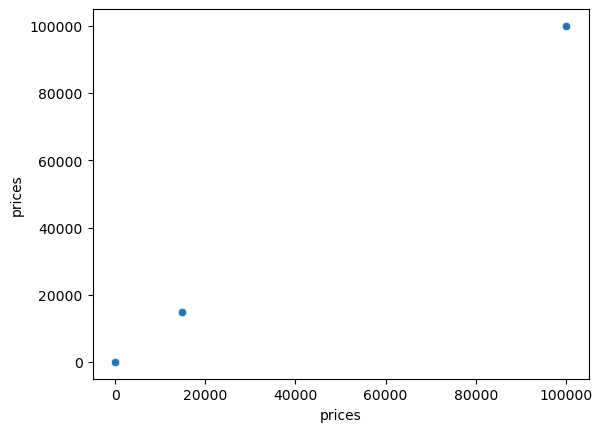

In [10]:
# create a Scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_cust_merge)

In [11]:
# find out how many products are there above the price range 100
ords_prods_cust_merge.loc[ords_prods_cust_merge['prices'] > 100]

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,surname,gender,state,age,n_dependants,family_status,income,check
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Barbara,Chang,Female,Kansas,39,3,married,150659,both
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Barbara,Chang,Female,Kansas,39,3,married,150659,both
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,nan,Chen,Female,Maryland,30,3,married,120635,both
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,nan,Chen,Female,Maryland,30,3,married,120635,both
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Ruby,Bates,Female,Minnesota,56,2,married,187328,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Jeremy,Vang,Male,Kentucky,62,0,divorced/widowed,302526,both
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,James,Hunter,Male,Maryland,60,1,married,172539,both
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,James,Hunter,Male,Maryland,60,1,married,172539,both
32380527,1916142,206049,1,2,17,7.0,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Louise,Leal,Female,District of Columbia,23,1,married,169022,both


In [12]:
# mark all the prices above 100 as missing since they don’t make sense in terms of the other values in the column
ords_prods_cust_merge.loc[ords_prods_cust_merge['prices'] > 100, 'prices'] = np.nan

In [13]:
ords_prods_cust_merge['prices'].max()

25.0

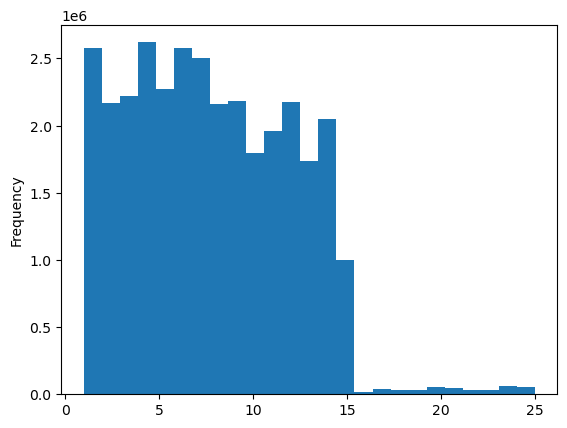

In [14]:
# After cleaning the data create the histogram again
hist = ords_prods_cust_merge['prices'].plot.hist(bins = 25)

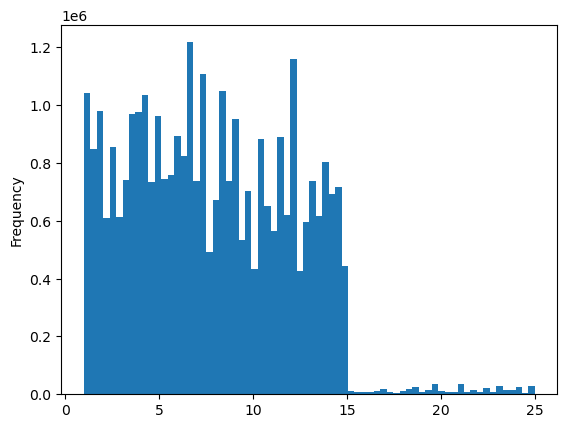

In [15]:
hist2 = ords_prods_cust_merge['prices'].plot.hist(bins = 70)

In [16]:
# Exporting the histogram as png image file
hist2.figure.savefig(os.path.join(path,'Analysis', 'Visualizations', 'histogram_prices.png'))

# Sampling Data

In [17]:
# set a random reproducible pattern
np.random.seed(4)
# create a list which holds an array of True or False for every value based on whether it’s less than or equal to 0.7
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [18]:
# output of dev
dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
# store 70% of the sample in the dataframe big
big = ords_prods_cust_merge[dev]

In [20]:
# store 30% of the sample in the dataframe small
small = ords_prods_cust_merge[~dev]

In [21]:
# output the length of the dataframe
len(ords_prods_cust_merge)

32404859

In [22]:
# checking the combined length of big and small is same as the original dataframe
len(big) + len(small)

32404859

In [23]:
# create a new dataframe which holds only the necessary columns from the ords_prods_cust_merge for faster processing
df_2 = small[['order_days_of_week', 'prices']]

C:\Users\Sreelakshmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sreelakshmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


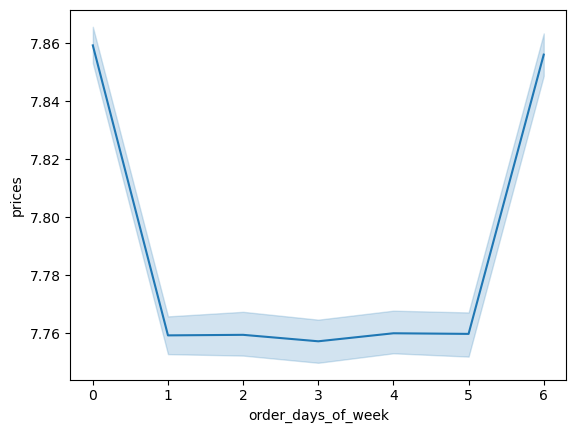

In [24]:
# create a line chart
line = sns.lineplot(data = df_2, x = 'order_days_of_week', y = 'prices')

In [25]:
# Exporting the line chart as png image file
line.figure.savefig(os.path.join(path,'Analysis', 'Visualizations', 'Line_chart_order_dow_prices.png'))

# Step 3 : Descriptive findings for Sales

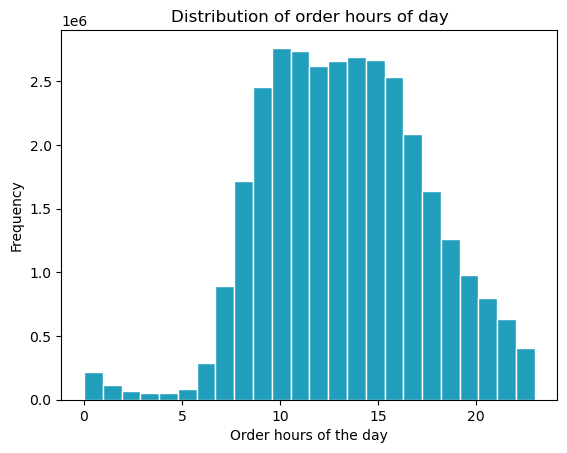

In [26]:
#  Create a histogram of the “order_hour_of_day” column
hist_order_hr_of_day = ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins = 24, color = '#219ebc',edgecolor = 'white')
plt.title('Distribution of order hours of day')
plt.xlabel('Order hours of the day')
plt.savefig(os.path.join(path,'Analysis', 'Visualizations', 'Histogram_order_hr_day.png'))

### Answer: According to the histogram, maximum number of orders are placed  between 9:00 am and 16:00 pm. From 16:00 pm onwards there is a decreasing trend in the ordering. Least number of orders are placed between 12:00 am and 6:00 am.

# Step 4 : Finding the distribution of orders among customers in terms of loyalty

In [1]:
# Create a bar chart from the “loyalty_flag” column
bar_cust_loyalty = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(color = ['#093a3e', '#3aafb9',  '#64e9ee'])

NameError: name 'ords_prods_cust_merge' is not defined

### Answer: According to the above diagram, Regular customers have placed most orders, then comes Loyal customers. New customers have placed least orders.

# Step 5 : Finding is there a difference in expenditure (the “prices” column) depending on the hour of the day 

In [39]:
# create a new dataframe which holds only the necessary columns from the ords_prods_cust_merge for faster processing from the small sample
df_order_hr_prices = ords_prods_cust_merge[['order_hour_of_day', 'prices']]

C:\Users\Sreelakshmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sreelakshmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


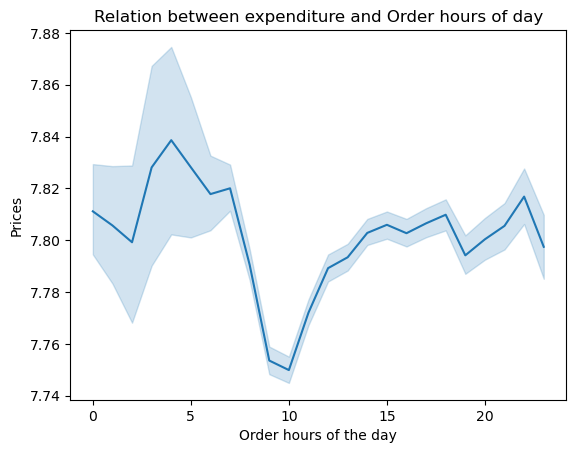

In [43]:
# create a line chart
line_order_hr_prices = sns.lineplot(data = df_order_hr_prices, x = 'order_hour_of_day', y = 'prices').set(title = 'Relation between expenditure and Order hours of day', xlabel = 'Order hours of the day', ylabel = 'Prices')

# Step 6: Exploratory analysis of customer demographics

In [30]:
# create a new dataframe which holds only the necessary columns from the ords_prods_cust_merge for faster processing 
df_age_dependants = ords_prods_cust_merge[['age','n_dependants']]

In [31]:
df_age_dependants.head()

,age,n_dependants
0,31,3
1,31,3
2,31,3
3,31,3
4,31,3


C:\Users\Sreelakshmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sreelakshmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


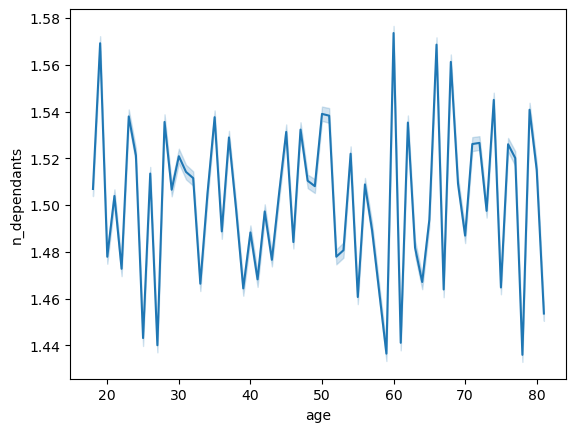

In [32]:
# Create a line chart exploring the connections between age and number of dependents
line_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age', y = 'n_dependants' )

### Answer: There is no specific correlation between age and number of dependants. From the line chart it is clear that the number of dependants varies randomly as the age increases.

# Step 7: Explore whether there’s a connection between age and spending power (income)

In [33]:
# create a dataframe which holds only the columns age and income
df_age_income = ords_prods_cust_merge[['age','income']]

In [34]:
df_age_income.head()

,age,income
0,31,40423
1,31,40423
2,31,40423
3,31,40423
4,31,40423


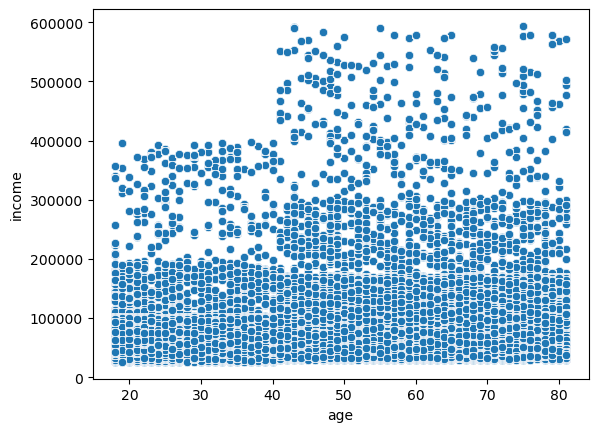

In [35]:
# create a Scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_cust_merge)

### Answer:
#### According to the Scatterplot diagram, from  age 20 to 80 a huge concentration of people are having income less than 200000. Among those between the age 20 and 40 are having the highest income around 400000. From the age of 40 onwards, some of the people have very high salaries that reaches around 600000. Is there a relationship exists beteween age and income? Yes, but it is not a steady progress. To conclude, people below the age of 40 are having lower income than people above 40 years of age.

# Step 8: Export the visualizations as png file to the relevant project folders


In [36]:
# expoting all the visualizations
hist_order_hr_of_day.figure.savefig(os.path.join(path,'Analysis', 'Visualizations', 'hist_order_hr_of_day.png'))
bar_cust_loyalty.figure.savefig(os.path.join(path,'Analysis', 'Visualizations', 'bar_cust_loyalty.png'))
line_order_hr_prices.figure.savefig(os.path.join(path,'Analysis', 'Visualizations', 'line_order_hr_prices.png'))
line_age_dependants.figure.savefig(os.path.join(path,'Analysis', 'Visualizations', 'line_age_dependants.png'))
scatterplot_age_income.figure.savefig(os.path.join(path,'Analysis', 'Visualizations', 'scatterplot_age_income.png'))

### Instacart has a lot of products with different price tags.
Marketing and sales want to 
use simpler price range groupings to help direct their efforts.

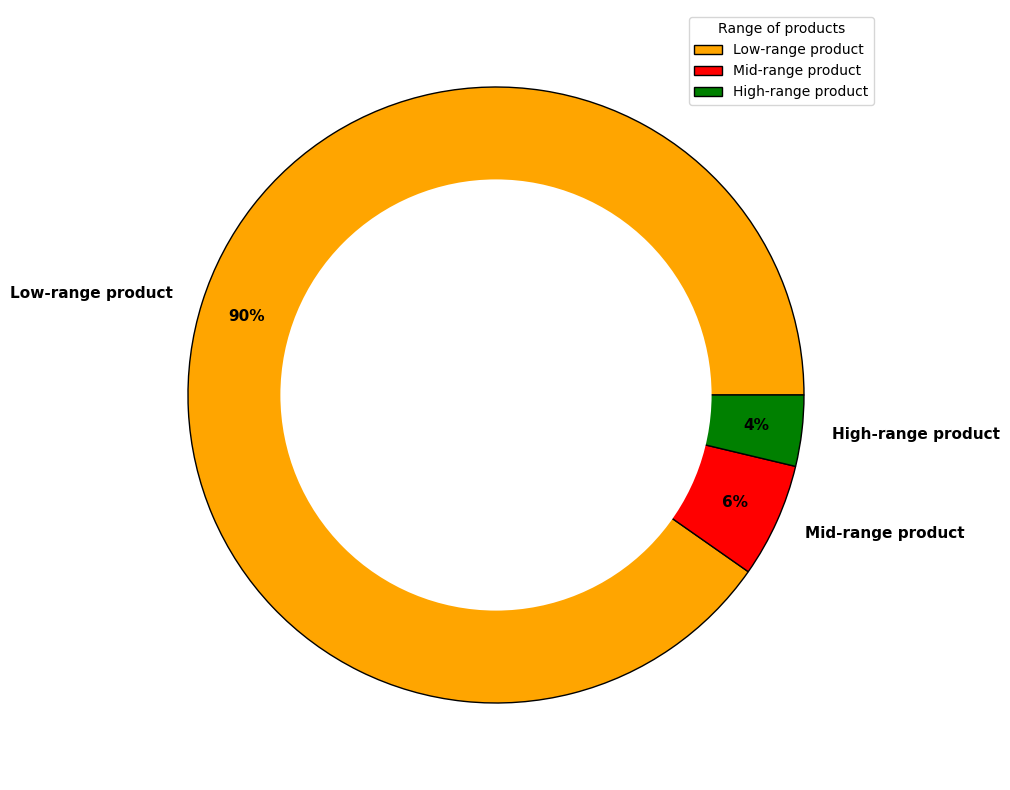

In [54]:
#create product groups
pdt_range_counts = ords_prods_cust_merge['price_range_loc'].value_counts()
mycolors = ["orange", "red", "green"]


#Pie Chart
plt.figure(figsize = (10,10))
plt.pie(pdt_range_counts,
        labels = pdt_range_counts.index,
        colors = mycolors,
        autopct = '%.0f%%',
        pctdistance=0.85,
        textprops=dict(color='k', weight='bold', fontsize=11),
        wedgeprops = {'edgecolor' : 'black'} # boarders
       )

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.legend(title = 'Range of products')
plt.show()


In [46]:
ords_prods_cust_merge['price_range_loc'].value_counts()

price_range_loc
Low-range product     10126321
Mid-range product       673183
High-range product      417678
Name: count, dtype: int64